In [8]:
import pandas as pd
import json
import sys
from analyzer import Analyzer
from utils import Parser

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [2]:
input_file_path = "data/rank-input.json"

my_parser = Parser()
df = my_parser.read_json_make_dataframe(input_path= input_file_path)

my_analyzer = Analyzer(df)
print(my_analyzer.list_of_weeks)


final_list = []

last_Week = my_analyzer.list_of_weeks[-1]
weekly_dict =  {
    "week" : int(last_Week),
    "ranks" : my_analyzer.calculate_trend_rank(last_Week) 
}
final_list.append(weekly_dict)


[2022114, 2022121, 2022122]


In [3]:

def show_regression_score(
    week : int,
    spot_id : int,
    analyzer : Analyzer
):

    last_week_index = analyzer.list_of_weeks.index(week)
    weekly_statistics = analyzer.get_weekly_statistics()
    list_of_weeks    = analyzer.list_of_weeks
    list_of_spot_ids = analyzer.data.spot_id.unique()

    spot_weekly_trend = weekly_statistics[spot_id]
    spot_weekly_trend = analyzer._fill_in_spot_weekly_trends(spot_weekly_trend)


    X = np.array(list(range(1, len(list_of_weeks)+1))[:last_week_index])
    X = X.reshape(-1, 1)
    y = spot_weekly_trend.iloc[:last_week_index]

    model = LinearRegression()
    model.fit(X = X, y = y)

    x_pred = np.linspace(0, 40, 200)            # 200 data points between 0 ~ 40
    x_pred = x_pred.reshape(-1, 1)  # preprocessing required by scikit-learn functions

    y_pred = model.predict(x_pred)

    y_true = spot_weekly_trend[list_of_weeks[last_week_index]]

    plt.style.use('default')
    plt.style.use('ggplot')

    fig, ax = plt.subplots(figsize=(7, 3.5))

    ax.plot(x_pred, y_pred, color='k', label='Regression model')
    ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Previous data')
    ax.scatter(list(range(1, len(list_of_weeks)+1))[last_week_index], y_true, edgecolor='k', facecolor='red', alpha=0.7, label='This week data')
    ax.set_ylabel('like Number', fontsize=14)
    ax.set_xlabel('Week', fontsize=14)
    ax.legend(facecolor='white', fontsize=11)
    ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

    fig.tight_layout()
    plt.show()
    
    return 

In [18]:
def show_z_score(
    week : int,
    spot_id : int,
    analyzer : Analyzer
):
    
    last_week_index = analyzer.list_of_weeks.index(week)
    weekly_statistics = analyzer.get_weekly_statistics()
    list_of_weeks    = analyzer.list_of_weeks
    list_of_spot_ids = analyzer.data.spot_id.unique()

    spot_weekly_trend = weekly_statistics[spot_id]
    spot_weekly_trend = analyzer._fill_in_spot_weekly_trends(spot_weekly_trend)


    X = np.array(list(range(1, len(list_of_weeks)+1))[:last_week_index])
    X = X.reshape(-1, 1)
    y = spot_weekly_trend.iloc[:last_week_index]

    mean = np.mean(y)
    std = np.std(y)

    if std == 0:
        print("No Distribution")
        return

    y_true = spot_weekly_trend[list_of_weeks[last_week_index]]
    z_score = (y_true - mean) / (std + sys.float_info.epsilon)

    x_pred = np.linspace(mean - 3*std, mean + 3*std, 100)          # 200 data points between 0 ~ 40
    x_pred = x_pred.reshape(-1, 1)  # preprocessing required by scikit-learn functions

    

    plt.style.use('default')
    plt.style.use('ggplot')


    fig, ax = plt.subplots(figsize=(7, 3.5))

    ax.plot(x_pred, stats.norm.pdf(x_pred, mean, std))
    #ax.scatter(z_score, y_true, edgecolor='k', facecolor='red', alpha=0.7, label='This week data')

    ax.legend(facecolor='white', fontsize=11)
    ax.text(0.55, 0.15, '$mean = %.2f std =%.2f $' % (mean, std ), fontsize=17, transform=ax.transAxes)

    fig.tight_layout()
    plt.show()
    
    return

In [19]:
show_z_score(2022122 ,259, my_analyzer)

No Distribution


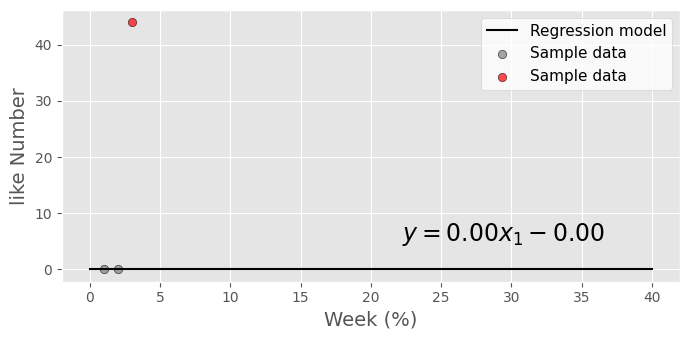

In [24]:

show_regression_score(2022122 ,347, my_analyzer)